## Diseño del modelo (paso a paso)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('C:\\Users\\manue\\Documents\\extraccion_conocimientos\\uteq\\Evaluacion\\datasets\\comprar_alquilar.csv')
df_numerico = df.select_dtypes(include=['number'])
df_numerico.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


### Análisis exploratorio de las variables

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


## Reducción de dimensionalidad sin escalamiento

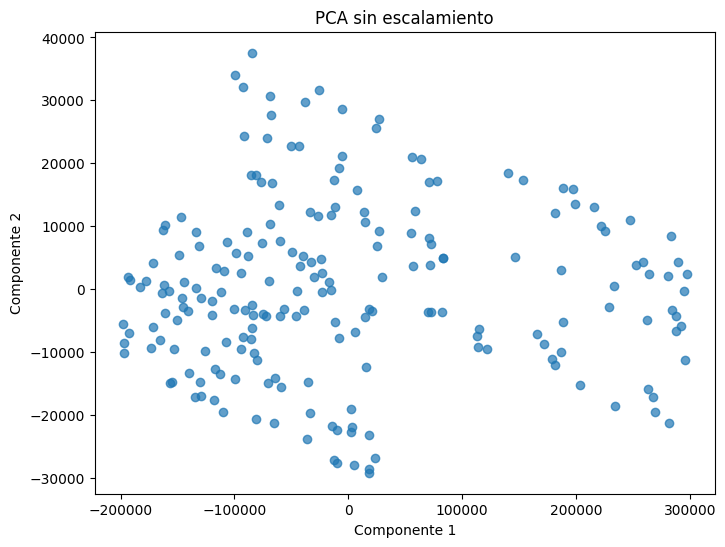

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA sin escalamiento')
plt.show()

## Reducción de dimensionalidad con escalamiento

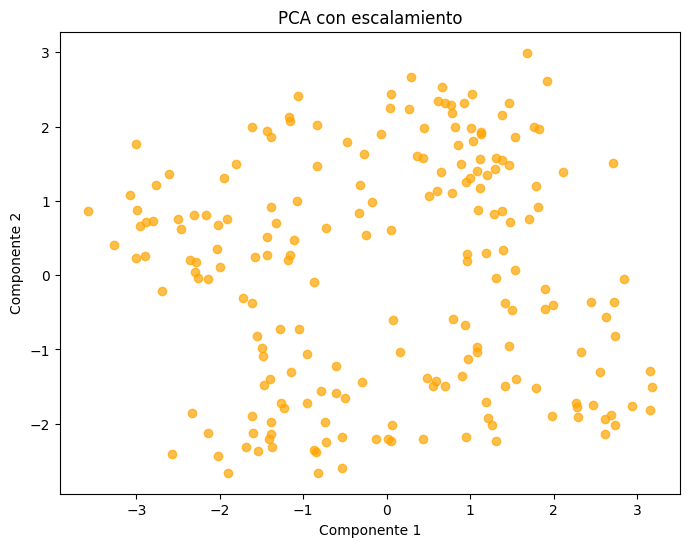

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca_scaled[:,0], X_pca_scaled[:,1], alpha=0.7, color='orange')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA con escalamiento')
plt.show()

## Interpretación de resultados
La comparación entre los componentes principales con y sin escalamiento permite observar el impacto del preprocesamiento en la distribución de los datos.

In [10]:
print('Varianza explicada sin escalamiento:', pca.explained_variance_ratio_)
print('Varianza explicada con escalamiento:', pca_scaled.explained_variance_ratio_)

Varianza explicada sin escalamiento: [0.98986362 0.0100648 ]
Varianza explicada con escalamiento: [0.27368381 0.23958688]


## Justificación del número de componentes
Se eligieron dos componentes principales para facilitar la visualización y porque explican la mayor parte de la varianza.